##### Problem Set 1, due April 5th at 5:30pm 


### Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download INFX574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [70]:
# #IPython is what you are using now to run the notebook
import math
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.1.0 (need at least 1.0)
Numpy version:        1.13.3 (need at least 1.7.1)
SciPy version:        0.19.1 (need at least 0.12.0)
Pandas version:       0.20.3 (need at least 0.11.0)
Mapltolib version:     2.1.0 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


## About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

## Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.
Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
flights_df= pd.read_csv('flights.csv')

In [8]:
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [9]:
a = flights_df.dest.unique()
print(a)
flights_df.head(10)

['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [10]:
# Your code here
len(flights_df[(flights_df.dest == "SEA") & (flights_df.year == 2013)])

3923

- Filter down the dataset by conditioning the columns which are Seattle as destination and flight year as 2013, then count the length of the filtered rows. The result is **3923** flights were there from NYC airports to Seattle in 2013.

(b) How many airlines fly from NYC to Seattle?

In [11]:
# Your code here
len((flights_df[flights_df.dest == "SEA"]["carrier"]).unique())

5

- First filter the destination only includes "SEA", then from the filtered dataset, get all the unique carrier. Finally we have a length of **5** which are **5** carriers fly from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [12]:
# Your code here
len((flights_df[flights_df.dest == "SEA"]["tailnum"]).unique())

936

- First filter the destination only includes "SEA", then from the filtered dataset, get all the unique flight number. Finally we have a length of **166** which are **166** unique air planes fly from NYC to Seattle.

(d) What is the average arrival delay for flights from NC to Seattle?

In [13]:
# Your code here
(flights_df[flights_df.dest == "SEA"]["arr_delay"].sum())/len(flights_df[flights_df.dest == "SEA"])

-1.088452714759113

- I first find the sum of arrival delay column with Seattle as destination. Then devided by the number of flights to get the average arrival delay for flights from NYC to Seattle 1.088452714759113.

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [14]:
# Your code here
# Answer 1
print(flights_df.origin.unique())
num = len(flights_df[flights_df.dest == "SEA"])
ewr = len(flights_df[(flights_df.dest == "SEA") & (flights_df.origin == "EWR")]) / num
lga = len(flights_df[(flights_df.dest == "SEA") & (flights_df.origin == "LGA")]) / num
jfk = len(flights_df[(flights_df.dest == "SEA") & (flights_df.origin == "JFK")]) / num
print('Answer 1: EWR = %f, LGA = %f, JFK = %f' %(ewr, lga, jfk))
# Answer 2


['EWR' 'LGA' 'JFK']
Answer 1: EWR = 0.466735, LGA = 0.000000, JFK = 0.533265


- In the first answer, I fisrt find the there are three airport in NYC, so I used them seperately to find the proportions. In order to find the proportion, I first filter the dataset by selecting the columns with SEA as destinaiton and each three airport in NYC as origin, it gets me the number of filghts departed from each airports in NYC to SEA. Then I use the total number devided the total flight numbers from NYC to SEA to get the proportion.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [231]:
# Your code here
largestDepartureDelay = flights_df[flights_df["dep_delay"] == flights_df["dep_delay"].max()]
yearD = largestDepartureDelay.year
monthD = largestDepartureDelay.month
dayD = largestDepartureDelay.day
print('Date of largest average departure delay: %i/%i/%i' %(monthD, dayD, yearD))

largestArrivalDelay = flights_df[flights_df["arr_delay"] == flights_df["arr_delay"].max()]
yearA = largestArrivalDelay.year
monthA = largestArrivalDelay.month
dayA = largestArrivalDelay.day
print('Date of largest average arrival delay: %i/%i/%i' %(monthA, dayA, yearA))

Date of largest average departure delay: 1/9/2013
Date of largest average arrival delay: 1/9/2013


- I first find the column has the maxium value of the dep_delay value then get the date information from that column. Same method with findind the date of largest average arrival delay. Turns out they are both on Jan 9th 2013.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [16]:
# Your code here
maxGroup = flights_df[flights_df.year == 2013].groupby(["month", "day"])
maxDelay = maxGroup["dep_delay"].sum().idxmax()
monthM = maxDelay[0]
dayM = maxDelay[1]
print('Date of largest average arrival delay: %i/%i/2013' %(monthM, dayM))

Date of largest average arrival delay: 3/8/2013


- I first groupby all the flights by their date then find the biggest total number dep_delay of flight in each date. From the tuple I get from the biggest delay date to then get the month and day. Beucase all the flight are already being filtered in 2013 so the year is known as 2013.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

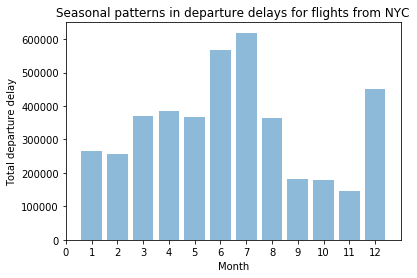

In [17]:
# Your code here
plt.clf()
maxGroupGraph = flights_df[flights_df.year == 2013].groupby("month")
plt.bar(maxGroupGraph.groups.keys(), maxGroupGraph["dep_delay"].sum(), align='center', alpha=0.5)
plt.xticks(np.arange(13))
plt.xlabel('Month')
plt.ylabel('Total departure delay')
plt.title('Seasonal patterns in departure delays for flights from NYC')
plt.show()

- By groupby the dataset by month and sum up the total number of dep_delay of each month, I then graph them into a bar chat by month on x-axis and the total number of dep_delay on y-axis, which is easier to see the the trend by month/season. From the bar chart we can see there is huge amount of different of dep_delay each month. The least delay happens in the month of Noverber and th most delay happends in the month of July which make sense because summer is the hottest vacation seasion, therefore, it may cause large amount of delay. 

(d) On average, how do departure delays vary over the course of a day?

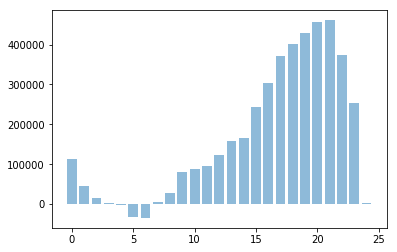

In [92]:
# Answer 1
delay_dict = dict()
for idx, row in flights_df.iterrows():
    if math.isnan(row["dep_time"]):
        continue
    h = int(row["dep_time"] / 100)
    if h in delay_dict:
        delay_dict[h] += row["dep_delay"]
    else:
        delay_dict[h] = row["dep_delay"]
plt.clf()
plt.bar(delay_dict.keys(), delay_dict.values(), align='center', alpha=0.5)
plt.show()

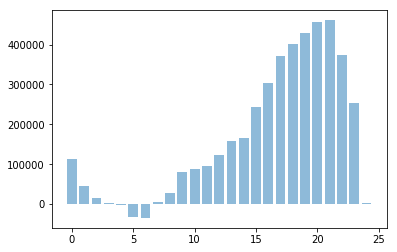

In [93]:
# Answer 2
flights_df["dep_hour"] = flights_df["dep_time"] / 100
flights_df["dep_hour"] = flights_df["dep_hour"].dropna().astype(int)
hours = flights_df.groupby("dep_hour")
delay_time = hours.dep_delay.sum()
plt.clf()
plt.bar(hours.groups.keys(), delay_time, align='center', alpha=0.5)
plt.show()

- In the answer 1 I want to save all the rows that has the same departure hour in a dictionary. Becuase the original departure time is not standard time(I think it's miltary time), so I divided them by 100 in order to get the hour of the each departure time. Then I sum the departure delay of the same hour of departure time to the dictionary as value with shared key which is the hour number(it's like groupby but in a different way). Then plot them by the different key(hour) in the x-axis, sum of departure delay as the y-axis.
- In the answer 2 I used the same cnocept but the pandas groupby intead so the running time has been significantly decresed.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [133]:
# Your code here
flights_df["speed"] = flights_df["distance"] / flights_df["air_time"]
fastest = flights_df[flights_df["speed"] == flights_df["speed"].max()]
display(fastest)
fastFlight = fastest["flight"].iloc[0]
fastCarrier = fastest["carrier"].iloc[0]
fastDest = fastest["dest"].iloc[0]

print("Flight %s%i flew to %s is the fastest flight departing NYC in 2013" %(fastCarrier, fastFlight, fastDest))


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_hour,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,17.0,11.723077


Flight DL1499 flew to ATL is the fastest flight departing NYC in 2013


- In this question, I first calculated the speed of each flight by dividing distance by air_time and insert them into a new column "speed" in the dataset. Then find the biggest speed number which is the fastest flight , from there then get that flight informaiton such as carrier and flight number which is flight **DL1449**.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [ ]:
# Your code here
# h = flights_df.groupby(["month", "day", "carrier"])
# h.duplicated(["flight", "dest"], keep=False)
# flights_df[flights_df.duplicated(["carrier", "flight", "dest", "year", "month", "day"], keep=False)].groupby(["month", "day", "carrier", "flight"]).last()
# only info needed
new_flights = flights_df[["month", "day", "carrier", "flight", "dest"]].drop_duplicates(["month", "day", "carrier", "flight", "dest"], keep="first")
new_flights_groups = new_flights.groupby(['month', 'day'])


common = list(i for i in new_flights_groups.get_group((1, 1))[["carrier", "flight", "dest"]].values)
for n, g in new_flights_groups:
    c2 = list(i for i in g[["carrier", "flight", "dest"]].values)
    print(c2)


#flights_df.drop_duplicates(["carrier", "flight", "dest", "month", "day"], keep='last').groupby(["month", "day"]).size()
#flights_df

[array(['UA', 1545, 'IAH'], dtype=object), array(['UA', 1714, 'IAH'], dtype=object), array(['AA', 1141, 'MIA'], dtype=object), array(['B6', 725, 'BQN'], dtype=object), array(['DL', 461, 'ATL'], dtype=object), array(['UA', 1696, 'ORD'], dtype=object), array(['B6', 507, 'FLL'], dtype=object), array(['EV', 5708, 'IAD'], dtype=object), array(['B6', 79, 'MCO'], dtype=object), array(['AA', 301, 'ORD'], dtype=object), array(['B6', 49, 'PBI'], dtype=object), array(['B6', 71, 'TPA'], dtype=object), array(['UA', 194, 'LAX'], dtype=object), array(['UA', 1124, 'SFO'], dtype=object), array(['AA', 707, 'DFW'], dtype=object), array(['B6', 1806, 'BOS'], dtype=object), array(['UA', 1187, 'LAS'], dtype=object), array(['B6', 371, 'FLL'], dtype=object), array(['MQ', 4650, 'ATL'], dtype=object), array(['B6', 343, 'PBI'], dtype=object), array(['DL', 1919, 'MSP'], dtype=object), array(['MQ', 4401, 'DTW'], dtype=object), array(['AA', 1895, 'MIA'], dtype=object), array(['DL', 1743, 'ATL'], dtype=object), array

[array(['B6', 739, 'PSE'], dtype=object), array(['B6', 727, 'BQN'], dtype=object), array(['US', 1117, 'CLT'], dtype=object), array(['UA', 1018, 'IAH'], dtype=object), array(['UA', 650, 'IAH'], dtype=object), array(['AA', 1141, 'MIA'], dtype=object), array(['B6', 725, 'BQN'], dtype=object), array(['B6', 380, 'BOS'], dtype=object), array(['DL', 731, 'DTW'], dtype=object), array(['US', 2114, 'BOS'], dtype=object), array(['US', 2161, 'DCA'], dtype=object), array(['MQ', 4650, 'ATL'], dtype=object), array(['US', 1833, 'PHL'], dtype=object), array(['B6', 507, 'FLL'], dtype=object), array(['EV', 4201, 'IAD'], dtype=object), array(['EV', 4911, 'DTW'], dtype=object), array(['AA', 707, 'DFW'], dtype=object), array(['B6', 371, 'FLL'], dtype=object), array(['DL', 461, 'ATL'], dtype=object), array(['MQ', 4401, 'DTW'], dtype=object), array(['B6', 125, 'FLL'], dtype=object), array(['EV', 4708, 'MKE'], dtype=object), array(['AA', 301, 'ORD'], dtype=object), array(['UA', 1030, 'LAX'], dtype=object), arr

[array(['B6', 739, 'PSE'], dtype=object), array(['US', 1117, 'CLT'], dtype=object), array(['UA', 1018, 'IAH'], dtype=object), array(['UA', 1219, 'IAH'], dtype=object), array(['AA', 1141, 'MIA'], dtype=object), array(['B6', 725, 'BQN'], dtype=object), array(['B6', 380, 'BOS'], dtype=object), array(['US', 2114, 'BOS'], dtype=object), array(['AA', 707, 'DFW'], dtype=object), array(['B6', 125, 'FLL'], dtype=object), array(['US', 2161, 'DCA'], dtype=object), array(['UA', 303, 'SFO'], dtype=object), array(['DL', 731, 'DTW'], dtype=object), array(['AA', 301, 'ORD'], dtype=object), array(['B6', 135, 'RSW'], dtype=object), array(['EV', 4201, 'IAD'], dtype=object), array(['EV', 5716, 'IAD'], dtype=object), array(['US', 1833, 'PHL'], dtype=object), array(['EV', 4252, 'MKE'], dtype=object), array(['DL', 461, 'ATL'], dtype=object), array(['FL', 345, 'ATL'], dtype=object), array(['B6', 507, 'FLL'], dtype=object), array(['EV', 4941, 'MSP'], dtype=object), array(['UA', 1030, 'LAX'], dtype=object), arr

[array(['US', 1117, 'CLT'], dtype=object), array(['UA', 1018, 'IAH'], dtype=object), array(['UA', 650, 'IAH'], dtype=object), array(['B6', 725, 'BQN'], dtype=object), array(['AA', 1141, 'MIA'], dtype=object), array(['EV', 5716, 'IAD'], dtype=object), array(['AA', 707, 'DFW'], dtype=object), array(['B6', 380, 'BOS'], dtype=object), array(['FL', 345, 'ATL'], dtype=object), array(['MQ', 4650, 'ATL'], dtype=object), array(['US', 2161, 'DCA'], dtype=object), array(['EV', 4201, 'IAD'], dtype=object), array(['B6', 371, 'FLL'], dtype=object), array(['UA', 1030, 'LAX'], dtype=object), array(['B6', 125, 'FLL'], dtype=object), array(['AA', 301, 'ORD'], dtype=object), array(['B6', 507, 'FLL'], dtype=object), array(['B6', 135, 'RSW'], dtype=object), array(['DL', 731, 'DTW'], dtype=object), array(['MQ', 4401, 'DTW'], dtype=object), array(['UA', 303, 'SFO'], dtype=object), array(['DL', 461, 'ATL'], dtype=object), array(['WN', 3223, 'MDW'], dtype=object), array(['UA', 733, 'BOS'], dtype=object), array

[array(['DL', 120, 'LAX'], dtype=object), array(['DL', 695, 'MCO'], dtype=object), array(['HA', 51, 'HNL'], dtype=object), array(['B6', 209, 'LGB'], dtype=object), array(['DL', 1131, 'DTW'], dtype=object), array(['AA', 2253, 'MIA'], dtype=object), array(['DL', 1685, 'MCO'], dtype=object), array(['B6', 991, 'PBI'], dtype=object), array(['B6', 85, 'FLL'], dtype=object), array(['DL', 1185, 'SLC'], dtype=object), array(['DL', 315, 'SJU'], dtype=object), array(['US', 1629, 'CLT'], dtype=object), array(['B6', 705, 'SJU'], dtype=object), array(['UA', 1227, 'PHX'], dtype=object), array(['DL', 2043, 'ATL'], dtype=object), array(['UA', 843, 'IAH'], dtype=object), array(['UA', 1519, 'STT'], dtype=object), array(['UA', 81, 'SFO'], dtype=object), array(['WN', 921, 'DEN'], dtype=object), array(['UA', 1707, 'TPA'], dtype=object), array(['AA', 2041, 'MIA'], dtype=object), array(['UA', 1165, 'PBI'], dtype=object), array(['B6', 1783, 'MCO'], dtype=object), array(['B6', 615, 'JAX'], dtype=object), array(

[array(['B6', 707, 'SJU'], dtype=object), array(['EV', 4210, 'BTV'], dtype=object), array(['US', 1117, 'CLT'], dtype=object), array(['UA', 1141, 'IAH'], dtype=object), array(['UA', 219, 'IAH'], dtype=object), array(['B6', 725, 'BQN'], dtype=object), array(['AA', 1141, 'MIA'], dtype=object), array(['MQ', 4650, 'ATL'], dtype=object), array(['B6', 380, 'BOS'], dtype=object), array(['EV', 4252, 'MKE'], dtype=object), array(['MQ', 3768, 'ORD'], dtype=object), array(['B6', 79, 'MCO'], dtype=object), array(['US', 2114, 'BOS'], dtype=object), array(['UA', 1744, 'MIA'], dtype=object), array(['9E', 3953, 'CVG'], dtype=object), array(['B6', 507, 'FLL'], dtype=object), array(['B6', 145, 'PBI'], dtype=object), array(['US', 2161, 'DCA'], dtype=object), array(['UA', 1217, 'DFW'], dtype=object), array(['EV', 4911, 'DTW'], dtype=object), array(['AA', 301, 'ORD'], dtype=object), array(['AA', 707, 'DFW'], dtype=object), array(['B6', 208, 'BUF'], dtype=object), array(['MQ', 4401, 'DTW'], dtype=object), ar

[array(['B6', 739, 'PSE'], dtype=object), array(['US', 1117, 'CLT'], dtype=object), array(['UA', 541, 'IAH'], dtype=object), array(['UA', 1714, 'IAH'], dtype=object), array(['AA', 1141, 'MIA'], dtype=object), array(['B6', 725, 'BQN'], dtype=object), array(['EV', 4354, 'IAD'], dtype=object), array(['AA', 707, 'DFW'], dtype=object), array(['B6', 507, 'FLL'], dtype=object), array(['B6', 145, 'PBI'], dtype=object), array(['B6', 371, 'FLL'], dtype=object), array(['DL', 731, 'DTW'], dtype=object), array(['EV', 5716, 'IAD'], dtype=object), array(['EV', 5689, 'IAD'], dtype=object), array(['FL', 345, 'ATL'], dtype=object), array(['AA', 301, 'ORD'], dtype=object), array(['UA', 1115, 'TPA'], dtype=object), array(['UA', 304, 'ORD'], dtype=object), array(['UA', 543, 'PBI'], dtype=object), array(['DL', 461, 'ATL'], dtype=object), array(['UA', 1087, 'LAS'], dtype=object), array(['WN', 3037, 'BWI'], dtype=object), array(['UA', 1185, 'RSW'], dtype=object), array(['UA', 421, 'SFO'], dtype=object), array

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -- Write your answer in English here -- 

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


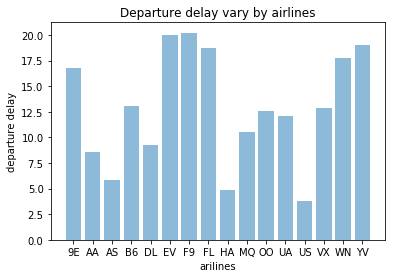

The most departure delay is 20.215543 by carrier F9


In [368]:
# Your code here
# Question: which airline has the most departure delay from NYC in 2013?
carrierGroup = flights_df.groupby("carrier")
plt.clf()
plt.bar(carrierGroup.groups.keys(), carrierGroup["dep_delay"].mean(), align='center', alpha=0.5)
plt.xlabel('arilines')
plt.ylabel('departure delay')
plt.title('Departure delay vary by airlines')
plt.show()

maxDelay = carrierGroup["dep_delay"].mean().max()
maxCarrier = carrierGroup["dep_delay"].mean().idxmax()
print("The most departure delay is %f by carrier %s" %(maxDelay, maxCarrier))

 -- Enter your discussion here --

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [283]:
# Your code here
weather_df= pd.read_csv('weather.csv')
weather_df.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In [243]:
flight_weather_df = pd.concat([flights_df, weather_df], axis=1)
flight_weather_df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,...,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,...,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,...,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,...,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,...,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


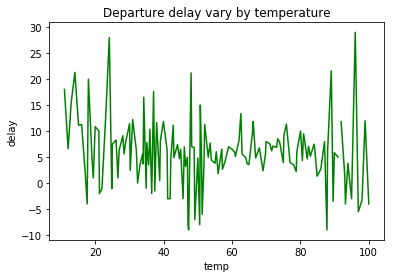

In [296]:
temp = flight_weather_df.groupby("temp")
tempSum = temp["dep_delay"].mean()
plt.clf()
plt.plot(tempSum.keys(), tempSum, color='g')
plt.xlabel('temperature')
plt.ylabel('delay')
plt.title('Departure delay vary by temperature')
plt.show()

- I first groupby the temp in the dataset and get the mean of departure delay time, then graph the temperature in the x-axis and delay time in the y-axis. There is no signaficant difference or trend on departure delay time effected by the temperature seen in the line chart.

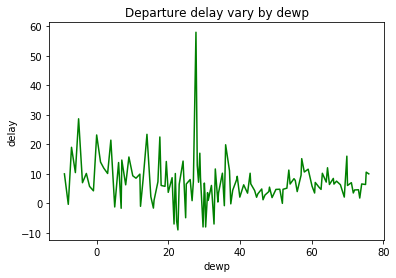

In [297]:
dewp = flight_weather_df.groupby("dewp")
dewpSum = dewp["dep_delay"].mean()
plt.clf()
plt.plot(dewpSum.keys(), dewpSum, color='g')
plt.xlabel('dewp')
plt.ylabel('delay')
plt.title('Departure delay vary by dewp')
plt.show()

- I first groupby the dewp in the dataset and get the mean of departure delay time, then graph the dewp in the x-axis and delay time in the y-axis. There is no signaficant difference or trend on departure delay time effected by the dewp seen in the line chart, however, the dewp at around 25 has a signaficant delay time.

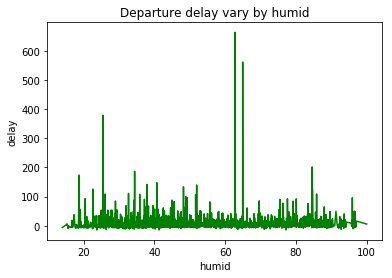

In [298]:
humid = flight_weather_df.groupby("humid")
humidSum = humid["dep_delay"].mean()
plt.clf()
plt.plot(humidSum.keys(), humidSum, color='g')
plt.xlabel('humid')
plt.ylabel('delay')
plt.title('Departure delay vary by humid')
plt.show()

- I first groupby the humid in the dataset and get the mean of departure delay time, then graph the humid in the x-axis and delay time in the y-axis. There is no signaficant difference or trend on departure delay time effected by the humid seen in the line chart, however, the humid at around 60-65 has a signaficant delay time. And overall, humid causes more delay than other weather condition.

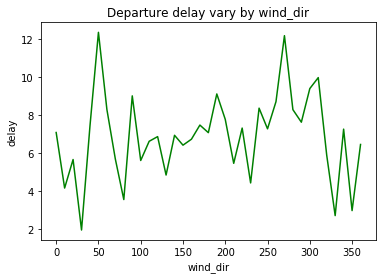

In [299]:
wind_dir = flight_weather_df.groupby("wind_dir")
wind_dirSum = wind_dir["dep_delay"].mean()
plt.clf()
plt.plot(wind_dirSum.keys(), wind_dirSum, color='g')
plt.xlabel('wind_dir')
plt.ylabel('delay')
plt.title('Departure delay vary by wind_dir')
plt.show()

- I first groupby the wind_dir in the dataset and get the mean of departure delay time, then graph the wind_dir in the x-axis and delay time in the y-axis. There is no signaficant difference or trend on departure delay time effected by the wind_dir seen in the line chart, however, overall the delay time caused by wind_dir is less than othere weather condition.

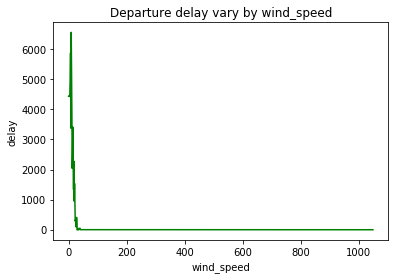

In [310]:
wind_speed = flight_weather_df.groupby("wind_speed")
wind_speedSum = wind_speed["dep_delay"].sum()
plt.clf()
plt.plot(wind_speedSum.keys(), wind_speedSum, color='g')
plt.xlabel('wind_speed')
plt.ylabel('delay')
plt.title('Departure delay vary by wind_speed')
plt.show()

- I first groupby the wind_speed in the dataset and get the sum of departure delay time, then graph the wind_speed in the x-axis and delay time in the y-axis. There is a **signaficant** difference on departure delay time effected by the wind_speed seen in the line chart, there is nearly no delay when the wind_speed is higher.

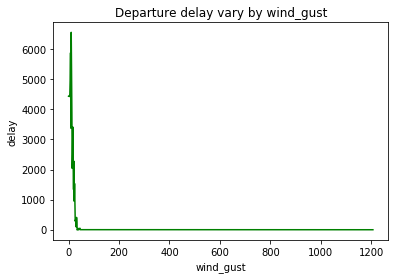

In [292]:
wind_gust = flight_weather_df.groupby("wind_gust")
wind_gustSum = wind_gust["dep_delay"].sum()
plt.clf()
plt.plot(wind_gustSum.keys(), wind_gustSum, color='g')
plt.xlabel('wind_gust')
plt.ylabel('delay')
plt.title('Departure delay vary by wind_gust')
plt.show()

- I first groupby the wind_gust in the dataset and get the sum of departure delay time, then graph the wind_gust in the x-axis and delay time in the y-axis. There is a **signaficant** difference on departure delay time effected by the wind_gust seen in the line chart, there is nearly no delay when the wind_gust is higher.

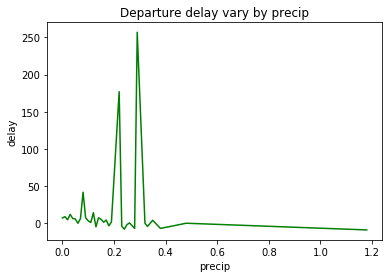

In [307]:
precip = flight_weather_df.groupby("precip")
precipSum = precip["dep_delay"].mean()
plt.clf()
plt.plot(precipSum.keys(), precipSum, color='g')
plt.xlabel('precip')
plt.ylabel('delay')
plt.title('Departure delay vary by precip')
plt.show()

- I first groupby the precip mean in the dataset and get the sum of departure delay time, then graph the precip in the x-axis and delay time in the y-axis. There is a **signaficant** difference on departure delay time effected by the mean seen in the line chart, around 0.2 and 0.3 there are huge departure delay time than other precip rate. Also, in general compares to other graphs, precip cause slightly more delay than other weather condiitons.

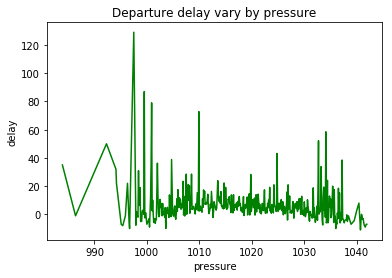

In [308]:
pressure = flight_weather_df.groupby("pressure")
pressureSum = pressure["dep_delay"].mean()
plt.clf()
plt.plot(pressureSum.keys(), pressureSum, color='g')
plt.xlabel('pressure')
plt.ylabel('delay')
plt.title('Departure delay vary by pressure')
plt.show()

- I first groupby the pressure mean in the dataset and get the sum of departure delay time, then graph the pressure in the x-axis and delay time in the y-axis. There is no signaficant difference on departure delay time effected by the mean seen in the line chart, but around 1000 pressure rate there are huge departure delay time than others.

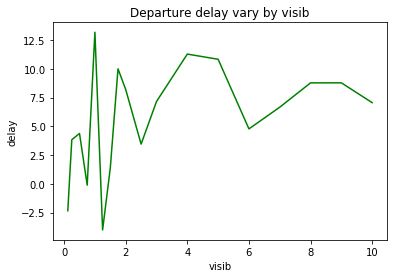

In [311]:
visib = flight_weather_df.groupby("visib")
visibSum = visib["dep_delay"].mean()
plt.clf()
plt.plot(visibSum.keys(), visibSum, color='g')
plt.xlabel('visib')
plt.ylabel('delay')
plt.title('Departure delay vary by visib')
plt.show()

- I first groupby the visib mean in the dataset and get the sum of departure delay time, then graph the visib in the x-axis and delay time in the y-axis. There is no signaficant difference on departure delay time effected by the visib seen in the line chart.